In [1]:
import torch
import numpy as np
import json
import os
from matplotlib import pyplot as plt


# Load data



data['all_logprobs'] contains all logprobs for correct token. 
It is max_docs arrays long. Each array is some length <= context, dtype=float32.  

data['mean_probs'] contains probabilities for each token from dictionary, averaged every 500 docs for memory purposes. 
It is max_docs/500 arrays long. Each array is shape (X,dictionary_size)

## 70m

In [2]:
# load data calculated for pythia70m
base_70m_data_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia70m-base_calculation_data_probs50000.p'
base_70m_data = torch.load(base_70m_data_path)

sft_70m_data_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia70m-sft_calculation_data_probs50000.p'
sft_70m_data = torch.load(sft_70m_data_path)

dpo_70m_data_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia70m-dpo_calculation_data_probs50000.p'
dpo_70m_data = torch.load(dpo_70m_data_path)

In [3]:
base_70m_perplexity_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia70m-base-50000.json'
sft_70m_perplexity_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia70m-sft-50000.json'
dpo_70m_perplexity_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia70m-dpo-50000.json'

with open(base_70m_perplexity_path,'r') as file: 
    base_70m_perplexity_data = json.loads(file.read())

with open(sft_70m_perplexity_path,'r') as file: 
    sft_70m_perplexity_data = json.loads(file.read())

with open(dpo_70m_perplexity_path,'r') as file: 
    dpo_70m_perplexity_data = json.loads(file.read())


In [4]:
base_70m_perplexity_data

{'entropy': 2.9469408988952637, 'perplexity': 19.047595977783203}

In [5]:
sft_70m_perplexity_data

{'entropy': 3.3237063884735107, 'perplexity': 27.763063430786133}

In [6]:
dpo_70m_perplexity_data

{'entropy': 3.400749921798706, 'perplexity': 29.98657989501953}

## 160m

In [2]:
# load data calculated for pythia160m
base_160m_data_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia160m-base_calculation_data_probs50000.p'
base_160m_data = torch.load(base_160m_data_path)

sft_160m_data_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia160m-sft_calculation_data_probs50000.p'
sft_160m_data = torch.load(sft_160m_data_path)

dpo_160m_data_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia160m-dpo_calculation_data_probs50000.p'
dpo_160m_data = torch.load(dpo_160m_data_path)

In [3]:
base_160m_perplexity_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia160m-base-50000.json'
sft_160m_perplexity_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia160m-sft-50000.json'
dpo_160m_perplexity_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia160m-dpo-50000.json'

with open(base_160m_perplexity_path,'r') as file: 
    base_160m_perplexity_data = json.loads(file.read())

with open(sft_160m_perplexity_path,'r') as file: 
    sft_160m_perplexity_data = json.loads(file.read())

with open(dpo_160m_perplexity_path,'r') as file: 
    dpo_160m_perplexity_data = json.loads(file.read())


In [4]:
base_160m_perplexity_data

{'entropy': 2.588127851486206, 'perplexity': 13.304839134216309}

In [5]:
sft_160m_perplexity_data

{'entropy': 2.743051767349243, 'perplexity': 15.534319877624512}

In [6]:
dpo_160m_perplexity_data

{'entropy': 2.804750680923462, 'perplexity': 16.5229549407959}

## Plot CDF of average token probability on The Pile val

## 70m

In [13]:
probs_base_70m = np.concatenate(base_70m_data["mean_probs"]).mean(0)
probs_base_70m_list = list(probs_base_70m)

probs_sft_70m = np.concatenate(sft_70m_data["mean_probs"]).mean(0)
probs_sft_70m.shape# (50304,)
probs_sft_70m_list = list(probs_sft_70m)

probs_dpo_70m = np.concatenate(dpo_70m_data["mean_probs"]).mean(0)
probs_dpo_70m_list = list(probs_dpo_70m)

In [14]:
base_70m_order = np.argsort(probs_base_70m_list)
sft_70m_order = np.argsort(probs_sft_70m_list)
dpo_70m_order = np.argsort(probs_dpo_70m_list)

In [15]:
# probs_base_list.sort(reverse=True) # doesn't copy to memory
probs_base_70m_list_sorted = sorted(probs_base_70m_list, reverse=True)
probs_sft_70m_list_sorted = sorted(probs_sft_70m_list, reverse=True) 
probs_dpo_70m_list_sorted = sorted(probs_dpo_70m_list, reverse=True)

In [16]:
base_70m_cdf = np.cumsum(probs_base_70m_list_sorted) 
sft_70m_cdf = np.cumsum(probs_sft_70m_list_sorted)
dpo_70m_cdf = np.cumsum(probs_dpo_70m_list_sorted)

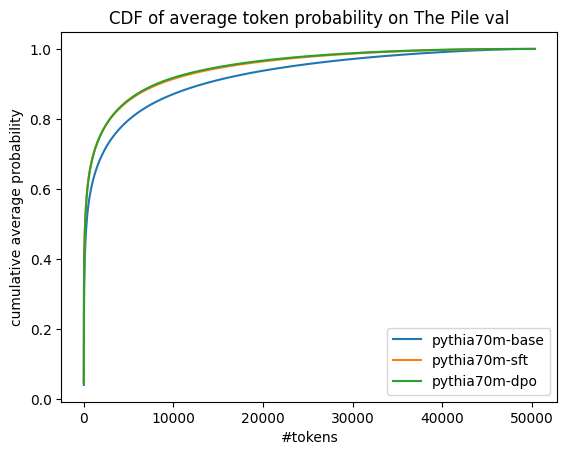

In [17]:
plt.plot(base_70m_cdf, label="pythia70m-base")
plt.plot(sft_70m_cdf, label="pythia70m-sft")
plt.plot(dpo_70m_cdf, label="pythia70m-dpo")

plt.title("CDF of average token probability on The Pile val")
plt.xlabel("#tokens")
plt.ylabel("cumulative average probability")
plt.legend()

(0.8, 1.0)

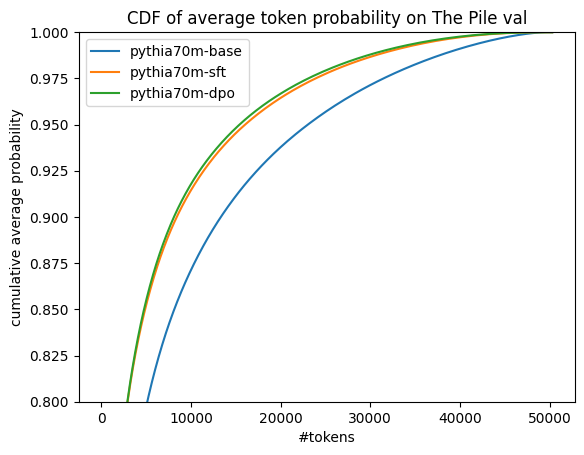

In [18]:
plt.plot(base_70m_cdf, label="pythia70m-base")
plt.plot(sft_70m_cdf, label="pythia70m-sft")
plt.plot(dpo_70m_cdf, label="pythia70m-dpo")

plt.title("CDF of average token probability on The Pile val")
plt.xlabel("#tokens")
plt.ylabel("cumulative average probability")
plt.legend()
plt.ylim((0.8,1))

In [34]:
# 50304 tokens in total. 
tot_toks = len(base_70m_cdf)

In [32]:
def first(the_iterable, condition = lambda x: True):
    for idx, cumprob in enumerate(the_iterable):
        if condition(cumprob):
            return idx

In [40]:
print("Proportion of total tokenizer where sum of average token probabilities at 70%: ")
print(f"Pythia70m base model: {first(base_70m_cdf, lambda i: i > 0.7)/tot_toks}")
print(f"Pythia70m sft model: {first(sft_70m_cdf, lambda i: i > 0.7)/tot_toks}")
print(f"Pythia70m dpo model: {first(dpo_70m_cdf, lambda i: i > 0.7)/tot_toks}")

Proportion of total tokenizer where sum of average token probabilities at 70%: 
Pythia70m base model: 0.04142811704834606
Pythia70m sft model: 0.021330311704834605
Pythia70m dpo model: 0.021708015267175574


In [41]:
print("Proportion of total tokenizer where sum of average token probabilities at 90%: ")
print(f"Pythia70m base model: {first(base_70m_cdf, lambda i: i > 0.9)/tot_toks}")
print(f"Pythia70m sft model: {first(sft_70m_cdf, lambda i: i > 0.9)/tot_toks}")
print(f"Pythia70m dpo model: {first(dpo_70m_cdf, lambda i: i > 0.9)/tot_toks}")

Proportion of total tokenizer where sum of average token probabilities at 90%: 
Pythia70m base model: 0.2651677798982188
Pythia70m sft model: 0.16734255725190839
Pythia70m dpo model: 0.16112038804071246


## 160m

In [16]:
# test
base_160m_data
# probs_base_160m = np.concatenate(base_160m_data["mean_probs"]).mean(0)


{'all_logprobs': [array([-9.182204  , -1.7143011 , -8.2249565 , ..., -1.9636934 ,
         -0.41925862, -1.9111646 ], dtype=float32),
  array([-9.97056580e+00, -1.03774920e+01, -3.81804562e+00, -2.13328171e+00,
         -6.48314142e+00, -5.41575432e+00, -8.55014038e+00, -1.05417082e-02,
         -9.17216873e+00, -3.88870811e+00, -9.88215446e+00, -5.23463917e+00,
         -9.78741169e+00, -2.56125391e-01, -9.49766859e-02, -4.17295361e+00,
         -3.62919182e-01, -1.78994024e+00, -4.07430840e+00, -1.32016256e-01,
         -5.80369234e+00, -1.44829905e+00, -1.81724715e+00, -9.41084766e+00,
         -3.31881714e+00, -3.98304701e+00, -8.77123070e+00, -4.47422123e+00,
         -1.28379405e+00, -2.59046793e+00, -2.51321220e+00, -4.18350983e+00,
         -1.15795299e-01, -6.67664194e+00, -5.79584694e+00, -3.69948435e+00,
         -4.98065424e+00, -9.81117249e-01, -2.64565110e+00, -6.10628796e+00,
         -5.29346085e+00, -2.29773973e-03, -4.22030783e+00, -2.14661747e-01,
         -5.1941168

In [12]:
probs_base_160m = np.concatenate(base_160m_data["mean_probs"]).mean(0)
probs_base_160m_list = list(probs_base_160m)

probs_sft_160m = np.concatenate(sft_160m_data["mean_probs"]).mean(0)
probs_sft_160m.shape# (50304,)
probs_sft_160m_list = list(probs_sft_160m)

probs_dpo_160m = np.concatenate(dpo_160m_data["mean_probs"]).mean(0)
probs_dpo_160m_list = list(probs_dpo_160m)

/tmp/ipykernel_614524/1737312361.py:1: RuntimeWarning: Mean of empty slice.
  probs_base_160m = np.concatenate(base_160m_data["mean_probs"]).mean(0)


TypeError: 'numpy.float64' object is not iterable

In [9]:
base_160m_order = np.argsort(probs_base_160m_list)
sft_160m_order = np.argsort(probs_sft_160m_list)
dpo_160m_order = np.argsort(probs_dpo_160m_list)

NameError: name 'probs_base_160m_list' is not defined

In [10]:
probs_base_160m_list_sorted = sorted(probs_base_160m_list, reverse=True)
probs_sft_160m_list_sorted = sorted(probs_sft_160m_list, reverse=True) 
probs_dpo_160m_list_sorted = sorted(probs_dpo_160m_list, reverse=True)

NameError: name 'probs_base_160m_list' is not defined

In [11]:
base_160m_cdf = np.cumsum(probs_base_160m_list_sorted)
sft_160m_cdf = np.cumsum(probs_sft_160m_list_sorted)
dpo_160m_cdf = np.cumsum(probs_dpo_160m_list_sorted)

NameError: name 'probs_base_160m_list_sorted' is not defined

In [ ]:
plt.plot(base_160m_cdf, label="pythia160m-base")
plt.plot(sft_160m_cdf, label="pythia160m-sft")
plt.plot(dpo_160m_cdf, label="pythia160m-dpo")

plt.title("CDF of average token probability on The Pile val")
plt.xlabel("#tokens")
plt.ylabel("cumulative average probability")
plt.legend()

In [ ]:
plt.plot(base_160m_cdf, label="pythia160m-base")
plt.plot(sft_160m_cdf, label="pythia160m-sft")
plt.plot(dpo_160m_cdf, label="pythia160m-dpo")

plt.title("CDF of average token probability on The Pile val")
plt.xlabel("#tokens")
plt.ylabel("cumulative average probability")
plt.legend()
plt.ylim((0.8,1))

## Random keep

In [73]:
# look at files 
# len(base_70m_data['all_logprobs']) # 49996
# base_70m_data['all_logprobs'][0].shape # (1492,)
# base_70m_data['all_logprobs'][1]#.shape # (606,) 

# len(base_70m_data['mean_probs']) # 100
# base_70m_data['mean_probs'][0].shape # (2, 50304)
# base_70m_data['mean_probs'][0]

## Other

In [ ]:
from transformers import GPTNeoXForCausalLM, AutoTokenizer
import torch
device = "cuda:0" 

In [ ]:
model_base = GPTNeoXForCausalLM.from_pretrained("EleutherAI/pythia-70m",).to(device)
model_sft = GPTNeoXForCausalLM.from_pretrained("lomahony/eleuther-pythia70m-hh-sft",).to(device)

tokenizer = AutoTokenizer.from_pretrained("lomahony/eleuther-pythia70m-hh-sft",)

In [ ]:
base_order

In [ ]:
tokenizer.convert_ids_to_tokens(base_order)

In [ ]:
probs_base_list[45000:]

In [ ]:
base_order[45000:]

In [ ]:
sft_order

In [ ]:
tokenizer.convert_ids_to_tokens(sft_order)

In [ ]:
probs_sft_list[45000:]

In [ ]:
sft_order[45000:]

In [14]:
base_70m_data["all_logprobs"][0]#.shape

array([ -9.856733 ,  -1.4485176, -10.939869 , ...,  -1.7004836,
        -1.9349098,  -1.1769702], dtype=float32)

## RW

In [102]:
test_noprobs_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia160m-base_calculation_data_test_noprobs.p'
test_noprobs = torch.load(test_noprobs_path)

In [101]:
test_noprobs1_path = f'{os.path.dirname(os.getcwd())}/outputs/pythia160m-base_calculation_data_test_noprobs1.p'
test_noprobs1 = torch.load(test_noprobs_path)

In [111]:
test_noprobs["next_pred_confidence"]

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 

In [122]:
test_noprobs1["next_pred_confidence"][0].shape # (2, 1024)
test_noprobs1["next_pred_confidence"][0]

array([[1.4247888e-01, 2.0431305e-06, 2.3718740e-05, ..., 5.5397737e-07,
        2.6912965e-05, 3.2088071e-06],
       [1.7651424e-01, 4.0768930e-03, 9.8829651e-06, ..., 1.6111302e-05,
        1.6111302e-05, 1.5557476e-03]], dtype=float32)

In [85]:
test_noprobs['mean_probs'][0].shape # (2, 50304)
test_noprobs['mean_probs'][0][0]
np.count_nonzero(test_noprobs['mean_probs'][0][0])

array([1.3937248e-03, 0.0000000e+00, 1.8613478e-05, ..., 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [99]:
# len(test_noprobs['all_logprobs']) # 200
# test_noprobs['all_logprobs'][0].shape # (1492,)
test_noprobs['all_logprobs'][0]

array([-9.182204  , -1.7143011 , -8.2249565 , ..., -1.9636934 ,
       -0.41925862, -1.9111646 ], dtype=float32)